# ME 581 HW 6
Yi Yang @ (yang1087@purdue.edu), all rights reserved.

## Problem 1
Consider the ODE $y' = -5y$, with initial condition $y(0) = 1$.

a. Is this ODE stable?

b. Is Euler's method stable for this ODE using a step size $h = 0.5$?

c. Calculate the numerical approximate solution for $t = 0$ to $t = 5$ given by Euler's method. Use time step size of $h = 0.5$ and $0.1$. Plot the analytical solution and numerical solution for each time step size.

d. Is the backward Euler method stable for this ODE using a step size of $h = 0.5$?

e. Calculate the numerical approximate solution for $t = 0$ to $t = 5$ given by the backward Euler method. Use a time step size, $h = 0.5$ and $0.1$. Plot the analytical and numerical solution for each time step size.

$\textbf{Solution:}$

a. This ODE is stable, since $\lambda = -5 \lt 0$.

b. Euler's method is not stable for this ODE using a step size $h = 0.5$, since $h \gt \frac{-2}{\lambda} = 0.4$.

c. The code generating approximated solutions for $t = 0$ to $t = 5$ and numerical solutions for each step are given below:

[[  1.          -1.5          2.25        -3.375        5.0625      -7.59375
   11.390625   -17.0859375   25.62890625 -38.44335938  57.66503906]]
[[  1.00000000e+00   5.00000000e-01   2.50000000e-01   1.25000000e-01
    6.25000000e-02   3.12500000e-02   1.56250000e-02   7.81250000e-03
    3.90625000e-03   1.95312500e-03   9.76562500e-04   4.88281250e-04
    2.44140625e-04   1.22070312e-04   6.10351562e-05   3.05175781e-05
    1.52587891e-05   7.62939453e-06   3.81469727e-06   1.90734863e-06
    9.53674316e-07   4.76837158e-07   2.38418579e-07   1.19209290e-07
    5.96046448e-08   2.98023224e-08   1.49011612e-08   7.45058060e-09
    3.72529030e-09   1.86264515e-09   9.31322575e-10   4.65661287e-10
    2.32830644e-10   1.16415322e-10   5.82076609e-11   2.91038305e-11
    1.45519152e-11   7.27595761e-12   3.63797881e-12   1.81898940e-12
    9.09494702e-13   4.54747351e-13   2.27373675e-13   1.13686838e-13
    5.68434189e-14   2.84217094e-14   1.42108547e-14   7.10542736e-15
    3.55271368

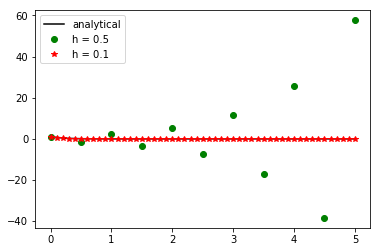

In [33]:
import numpy as np
from matplotlib import pyplot as plt

def eulerForward(x,f,h,T):
    # x - initial value, f - matrix function, h - step size, T - time range
    N = int(np.floor((T[1] - T[0])/h) + 1)
    y = np.empty((N,len(x)))
    for i in range(N):
        y[i] = np.copy(x)
        for j in range(len(x)):
            x[j] = x[j] + h*f[j](T[0] + i*h,x)
    return y
def F1(t,y):
    return -5.*y[0]
f1 = np.array([F1])
x10 = np.array([1.])
h11 = 0.5
h12 = 0.1
T = [0,5]
y11 = eulerForward(np.copy(x10),np.copy(f1),np.copy(h11),np.copy(T)) 
y12 = eulerForward(np.copy(x10),np.copy(f1),np.copy(h12),np.copy(T))
print(np.transpose(y11))
print(np.transpose(y12))
t1 = np.linspace(0,5,20)
plt.figure(1)
plt.plot(t1,np.exp(-5.*t1),'k',label='analytical')
plt.plot(np.arange(T[0],T[1]+0.001,h11),np.transpose(y11)[0],'go',label='h = 0.5')
plt.plot(np.arange(T[0],T[1]+0.001,h12),np.transpose(y12)[0],'r*',label='h = 0.1')
plt.legend()
plt.show()

d. The backward Euler method is stable for this ODE, since $h > 0$ and $\lambda \lt 0$.

e. The code generating the numerical approximated solutions for $t = 0$ to $t = 5$ using backward Euler and results are given below:

[[  1.00000000e+00   2.85714286e-01   8.16326531e-02   2.33236152e-02
    6.66389005e-03   1.90396858e-03   5.43991024e-04   1.55426007e-04
    4.44074305e-05   1.26878373e-05   3.62509637e-06]]
[[  1.00000000e+00   6.66666667e-01   4.44444444e-01   2.96296296e-01
    1.97530864e-01   1.31687243e-01   8.77914952e-02   5.85276635e-02
    3.90184423e-02   2.60122949e-02   1.73415299e-02   1.15610199e-02
    7.70734663e-03   5.13823109e-03   3.42548739e-03   2.28365826e-03
    1.52243884e-03   1.01495923e-03   6.76639485e-04   4.51092990e-04
    3.00728660e-04   2.00485773e-04   1.33657182e-04   8.91047881e-05
    5.94031921e-05   3.96021280e-05   2.64014187e-05   1.76009458e-05
    1.17339639e-05   7.82264258e-06   5.21509505e-06   3.47673003e-06
    2.31782002e-06   1.54521335e-06   1.03014223e-06   6.86761488e-07
    4.57840992e-07   3.05227328e-07   2.03484885e-07   1.35656590e-07
    9.04377268e-08   6.02918179e-08   4.01945453e-08   2.67963635e-08
    1.78642423e-08   1.19094949e-08

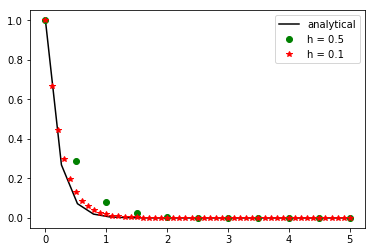

In [34]:
# This is a simplified version
# for general case, use sympy...
from sympy.solvers import solve
from sympy import Symbol, Function

def eulerBackward(x,f,h,T):
    # x - initial value, f - matrix function, h - step size, T - time range
    N = int(np.floor((T[1] - T[0])/h) + 1)
    y = np.empty((N,len(x)))
    for i in range(N):
        y[i] = np.copy(x)
        for j in range(len(x)):
            #fj = np.copy(f[j])
            #ff = Function('fj')
            #ynew = Symbol('ynew')
            #x[j] = solve(x[j] + h*ff(T[0] + (i+1)*h,ynew) - ynew,ynew)
            x[j] = 1./(1 + 5.*h)*x[j]
    return y

yb11 = eulerBackward(np.copy(x10),np.copy(f1),np.copy(h11),np.copy(T)) 
yb12 = eulerBackward(np.copy(x10),np.copy(f1),np.copy(h12),np.copy(T))
print(np.transpose(yb11))
print(np.transpose(yb12))
plt.figure(2)
plt.plot(t1,np.exp(-5.*t1),'k',label='analytical')
plt.plot(np.arange(T[0],T[1]+0.001,h11),np.transpose(yb11)[0],'go',label='h = 0.5')
plt.plot(np.arange(T[0],T[1]+0.001,h12),np.transpose(yb12)[0],'r*',label='h = 0.1')
plt.legend()
plt.show()

## Problem 2
Consider the initial value problem with a step size of $h = 0.08$.
$$y'' + 6y' + 8.96y = 0$$
$$y(0) = 1$$
$$y'(0) = 5$$
a. Write the analytical solution.

b. Perfome numerical integration from $t = 0$ to $8$ using 4th order Runge-Kutta method.

c. Perform numerical integration from $t = 0$ to $8$ using Euler's method.

d. Perform numerical integration from $t = 0$ to $8$ using Taylor series method of order 2.

e. Plot analytical, Euler, Taylor and Runge-Kutta solutions in the same plot.

$\textbf{Solution:}$

a. The analytical solution is given as
$$y(t) = \frac{41}{2}e^{-\frac{14}{5}t} - \frac{39}{2}e^{-\frac{16}{5}t}$$
$$y'(t) = -\frac{287}{5}e^{-\frac{14}{5}t} + \frac{312}{5}e^{-\frac{16}{5}t}$$

b. The code using 4th order Runge-Kutta method is given below, the second order ODE can be converted to two first order system of ODEs.
$$y_1' = y_2$$
$$y_2' = -8.96y_1 - 6y_2$$

In [35]:
def rungeKutta(x,f,h,T):
    # x - initial value, f - matrix function, h - step size, T - time range
    N = int(np.floor((T[1] - T[0])/h) + 1)
    y = np.empty((N,len(x)))
    for i in range(N):
        y[i] = np.copy(x)
        K1 = f(T[0] + i*h,x)
        K2 = f(T[0] + i*h + h/2,x + h/2*K1)
        K3 = f(T[0] + i*h + h/2,x + h/2*K2)
        K4 = f(T[0] + i*h + h, x + h*K3)
        x = x + h/6*(K1 + 2*K2 + 2*K3 + K4)
    return y
x20 = np.array([1,5])
#f2 = lambda t,y : [y[1], -8.96*y[0] - 6*y[1]]
def f2(t,y):
    return np.array([y[1], -8.96*y[0] - 6*y[1]])
h2 = 0.08
T2 = [0, 8]
y21 = rungeKutta(np.copy(x20),f2,np.copy(h2),np.copy(T2))
print(np.transpose(y21))

[[  1.00000000e+00   1.29011340e+00   1.41116135e+00   1.42210632e+00
    1.36442415e+00   1.26689030e+00   1.14911704e+00   1.02415765e+00
    9.00415129e-01   7.83034042e-01   6.74909493e-01   5.77413418e-01
    4.90913041e-01   4.15137235e-01   3.49432153e-01   2.92936759e-01
    2.44700833e-01   2.03762036e-01   1.69194148e-01   1.40135278e-01
    1.15802404e-01   9.54967991e-02   7.86035647e-02   6.45875452e-02
    5.29871837e-02   4.34073858e-02   3.55120903e-02   2.90169972e-02
    2.36827211e-02   1.93085196e-02   1.57266606e-02   1.27974406e-02
    1.04048323e-02   8.45271739e-03   6.86165378e-03   5.56611911e-03
    4.51217412e-03   3.65549183e-03   2.95970234e-03   2.39500796e-03
    1.93702836e-03   1.56584046e-03   1.26518227e-03   1.02179432e-03
    8.24876036e-04   6.65637928e-04   5.36933313e-04   4.32955981e-04
    3.48992359e-04   2.81218624e-04   2.26534835e-04   1.82429488e-04
    1.46869023e-04   1.18207805e-04   9.51148261e-05   7.65140940e-05
    6.15361873e-05  

c. The code using Euler's method and results are shown below:

In [36]:
def eulerForwardM(x,f,h,T):
    # x - initial value, f - matrix function, h - step size, T - time range
    N = int(np.floor((T[1] - T[0])/h) + 1)
    y = np.empty((N,len(x)))
    for i in range(N):
        y[i] = np.copy(x)
        x = x + h*f(T[0] + i*h,x)
    return y
y22 = eulerForwardM(np.copy(x20),f2,np.copy(h2),np.copy(T2))
print(np.transpose(y22))

[[  1.00000000e+00   1.40000000e+00   1.55065600e+00   1.54871552e+00
    1.45878565e+00   1.32321258e+00   1.16906198e+00   1.01302536e+00
    8.64847630e-01   7.29704285e-01   6.09835922e-01   5.05660211e-01
    4.16518410e-01   3.41168095e-01   2.78101099e-01   2.25742318e-01
    1.82568322e-01   1.47172877e-01   1.18298048e-01   9.48436551e-02
    7.58636876e-02   6.05553900e-02   4.82447479e-02   3.83707257e-02
    3.04696874e-02   2.41608165e-02   1.91329499e-02   1.51329815e-02
    1.19558380e-02   9.43593766e-03   7.43999392e-03   5.86100878e-03
    4.61329749e-03   3.62839393e-03   2.85169915e-03   2.23975124e-03
    1.75801049e-03   1.37906901e-03   1.08120808e-03   8.47239068e-04
    6.63574384e-04   5.19484672e-04   4.06506012e-04   3.17967779e-04
    2.48617218e-04   1.94321382e-04   1.51830841e-04   1.18592595e-04
    9.26021186e-05   7.22864974e-05   5.64121985e-05   4.40123662e-05
    3.43295522e-05   2.67706439e-05   2.08714177e-05   1.62686842e-05
    1.26784123e-05  

d. The code using second order Taylor series and the results are shown below:

In [37]:
def df2(t, y):
    return np.array([-8.96*y[0] - 6*y[1], 53.76*y[0] + 27.04*y[1]])
def taylorSeries(x,f,df,h,T):
    # x - initial value, f - matrix function, h - step size, T - time range
    N = int(np.floor((T[1] - T[0])/h) + 1)
    y = np.empty((N,len(x)))
    for i in range(N):
        y[i] = np.copy(x)
        x = x + h*f(T[0] + i*h,x) + h**2/2*df(T[0] + i*h,x)
    return y
y23 = taylorSeries(np.copy(x20),f2,df2,np.copy(h2),np.copy(T2))
print(np.transpose(y23))

[[  1.00000000e+00   1.27532800e+00   1.39002441e+00   1.39967337e+00
    1.34352709e+00   1.24893220e+00   1.13461264e+00   1.01309540e+00
    8.92495138e-01   7.77820547e-01   6.71925218e-01   5.76194993e-01
    4.91040862e-01   4.16248948e-01   3.51226047e-01   2.95169254e-01
    2.47180825e-01   2.06343869e-01   1.71770289e-01   1.42629344e-01
    1.18162868e-01   9.76915222e-02   8.06151847e-02   6.64096728e-02
    5.46213342e-02   4.48605486e-02   3.67948404e-02   3.01420560e-02
    2.46638841e-02   2.01598761e-02   1.64620447e-02   1.34300611e-02
    1.09470384e-02   8.91586681e-03   7.25605503e-03   5.90102694e-03
    4.79582141e-03   3.89514538e-03   3.16173296e-03   2.56496801e-03
    2.07973172e-03   1.68544140e-03   1.36525096e-03   1.10538746e-03
    8.94601816e-04   7.23714972e-04   5.85243511e-04   4.73091451e-04
    3.82296837e-04   3.08823697e-04   2.49391475e-04   2.01335349e-04
    1.62491968e-04   1.31106088e-04   1.05754353e-04   8.52831290e-05
    6.87578433e-05  

e. Plots for analytical, Euler, Taylor and Runge-Kutta solutions are shown below:

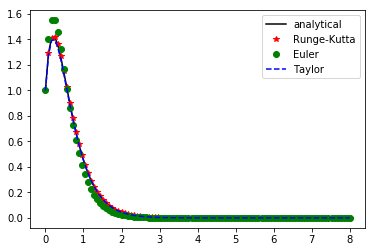

In [38]:
plt.figure(3)
t2 = np.linspace(0,8,101)
plt.plot(t2,41./2*np.exp(-14./5*t2) - 39./2*np.exp(-16./5*t2),'k-',label='analytical')
plt.plot(np.arange(T2[0],T2[1]+0.001,h2),np.transpose(y21)[0],'r*',label='Runge-Kutta')
plt.plot(np.arange(T2[0],T2[1]+0.001,h2),np.transpose(y22)[0],'go',label='Euler')
plt.plot(np.arange(T2[0],T2[1]+0.001,h2),np.transpose(y23)[0],'b--',label='Taylor')
plt.legend()
plt.show()

## Problem 3
Consider the system of differential equaitons
$$\frac{dy_1}{dt} = -0.013y_1 - 1000y_1y_3$$
$$\frac{dy_2}{dt} = -2500y_2y_3$$
$$\frac{dy_3}{dt} = -0.013y_1 - 1000y_1y_3 - 2500y_2y_3$$
Initial conditions: $y_1(0) = 1$, $y_2(0) = 1$ and $y_3(0) = 0$.

Approximate the solution from $t = 0$ to $5$ using the Runge-Kutta 4th order method and Euler method with a step size of $h = 0.0001$.

$\textbf{Solution:}$ Code using 4th order Runge-Kutta and Euler method with a step size of $h = 0.0001$ is given below:

In [39]:
x30 = np.array([1.,1.,0.])
T3 = [0, 5]
h3 = 0.0001
def f3(t,y):
    return np.array([-0.013*y[0] - 1000.*y[0]*y[2], -2500.*y[1]*y[2],\
                     -0.013*y[0] - 1000.*y[0]*y[2] - 2500.*y[1]*y[2]])
y31 = rungeKutta(np.copy(x30),f3,np.copy(h3),np.copy(T3))
print(np.transpose(y31))
y32 = eulerForwardM(np.copy(x30),f3,np.copy(h3),np.copy(T3))
print(np.transpose(y32))

[[  1.00000000e+00   9.99998758e-01   9.99997609e-01 ...,   9.54057475e-01
    9.54056567e-01   9.54055658e-01]
 [  1.00000000e+00   1.00000015e+00   1.00000052e+00 ...,   1.04593905e+00
    1.04593996e+00   1.04594087e+00]
 [  0.00000000e+00  -1.09671857e-06  -1.86960722e-06 ...,  -3.47523770e-06
   -3.47523306e-06  -3.47522843e-06]]
[[  1.00000000e+00   9.99998700e-01   9.99997530e-01 ...,   9.54057466e-01
    9.54056557e-01   9.54055648e-01]
 [  1.00000000e+00   1.00000000e+00   1.00000033e+00 ...,   1.04593906e+00
    1.04593997e+00   1.04594088e+00]
 [  0.00000000e+00  -1.30000000e-06  -2.14499848e-06 ...,  -3.47523765e-06
   -3.47523301e-06  -3.47522838e-06]]


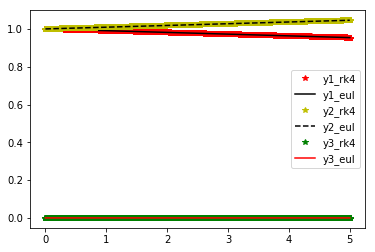

In [40]:
plt.figure(4)
plt.plot(np.arange(0,5.000001,0.0001),np.transpose(y31)[0],'r*',label='y1_rk4')
plt.plot(np.arange(0,5.000001,0.0001),np.transpose(y32)[0],'k-',label='y1_eul')
plt.plot(np.arange(0,5.000001,0.0001),np.transpose(y31)[1],'y*',label='y2_rk4')
plt.plot(np.arange(0,5.000001,0.0001),np.transpose(y32)[1],'k--',label='y2_eul')
plt.plot(np.arange(0,5.000001,0.0001),np.transpose(y31)[2],'g*',label='y3_rk4')
plt.plot(np.arange(0,5.000001,0.0001),np.transpose(y32)[2],'r-',label='y3_eul')
plt.legend()
plt.show()

## Problem 4
Approximate the solution from $t = 0$ to $5$ using the 2nd order Runge-Kutta method (Heun method) for initial value problems given in (a), (b) and (c).

(a) $$y' = -200y + 200\sin(t) + \cos(t),\quad y(0) = 1$$

(i) Determine the maximum allowable time step to maintain absolute stability

(ii) Compute the approximate solution using a step size, $h = 0.008$ and plot the solution with time.

(iii) Compute the approximate solution using a step size, $h = 0.012$ and plot the solution with time.

(b)
$$u_1' = 9u_1 + 24u_2 + 5\cos(t) - \frac{1}{3}\sin(t),\quad u_1(0) = \frac{4}{3}$$
$$u_2' = -24u_1 - 51u_2 - 9\cos(t) + \frac{1}{3}\sin(t),\quad u_2(0) = \frac{2}{3}$$

(i) Determine the maximum allowable time step to maintain abosulte stability

(ii) Compute the approximate solution using a step size, $h = 0.04$ and plot the solution with time

(iii) Compute the approximate solution using a step size, $h = 0.06$ and plot the solution with time

(c)
$$u_1' = -20u_1 - 19u_2\quad u_1(0) = 2$$
$$u_2' = -19u_1 - 20u_2\quad u_2(0) = 0$$

(i) Determine the maximum allowable time step to maintain abosulte stability

(ii) Compute the approximate solution using a step size, $h = 0.04$ and plot the solution with time

(iii) Compute the approximate solution using a step size, $h = 0.06$ and plot the solution with time

$\textbf{Solution:}$

(a) 

(i) Using $y' = \lambda y$ to analyze the stability of ODE, we get
$$y_{k+1} = (1 + h\lambda + \frac{1}{2}h^2\lambda^2)y_k$$
That is, $h\gt 0$ and $h \lt -\frac{2}{\lambda}$. The maximum allowable time step size is $0.01$.

(ii) The code using Heun method is given below:

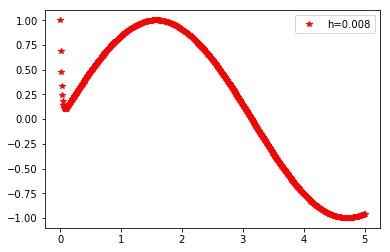

In [41]:
def rungeKutta2(x,f,h,T):
    # x - initial value, f - matrix function, h - step size, T - time range
    N = int(np.floor((T[1] - T[0])/h) + 1)
    y = np.empty((N,len(x)))
    for i in range(N):
        y[i] = np.copy(x)
        K1 = f(T[0] + i*h,x)
        K2 = f(T[0] + i*h + h,x + h*K1)
        x = x + h/2*(K1 + K2)
    return y
def f41(t,y):
    return np.array([-200.*y[0] + 200.*np.sin(t) + np.cos(t)])
x410 = np.array([1.])
h411 = 0.008
T4 = [0, 5]
y411 = rungeKutta2(np.copy(x410),f41,np.copy(h411),np.copy(T4))
#print(np.transpose(y411)[0])
plt.figure(5)
plt.plot(np.arange(T[0],T[1]+0.000001,h411),np.transpose(y411)[0],'r*',label='h=0.008')
plt.legend()
plt.show()

(iii) Results for the step size set to $h = 0.012$ is given below,

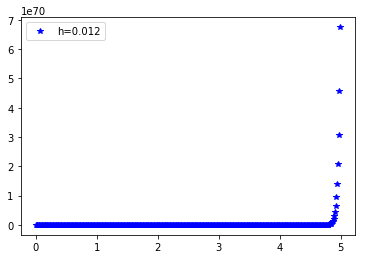

In [42]:
h412 = 0.012
y412 = rungeKutta2(np.copy(x410),f41,np.copy(h412),np.copy(T4))
#print(np.transpose(y411)[0])
plt.figure(6)
plt.plot(np.arange(T[0],T[1]+0.000001,h412),np.transpose(y412)[0],'b*',label='h=0.012')
plt.legend()
plt.show()

(b)

(i) We apply the normal form of $y' = Ay$ to analyze the stability of the numerical algorithm, that is
$$|I + hA + \frac{1}{2}h^2A^2| < 1$$
Where $I$ is the identity matrix and $A$ is the coefficient matrix. For this problem, we have
$$A = \begin{pmatrix}
9 & 24\\
-24 & -51
\end{pmatrix}$$
Then, we have $h \lt \frac{2}{39} \approx 0.0513$, which means the maximum allowable time step to maintain absolute stability is $h = 0.0513$

(ii) Code to generate results for $h = 0.04$ is given below:

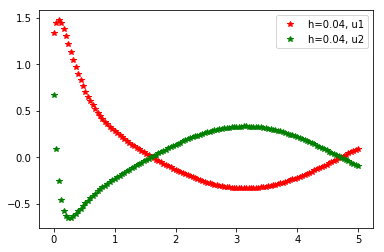

In [43]:
def f42(t,y):
    return np.array([9.*y[0] + 24.*y[1] + 5.*np.cos(t) - 1./3*np.sin(t),\
                    -24.*y[0] - 51.*y[1] - 9.*np.cos(t) + 1./3*np.sin(t)])
x420 = np.array([4./3., 2./3.])
h421 = 0.04
y421 = rungeKutta2(np.copy(x420),f42,np.copy(h421),np.copy(T4))
#print(np.transpose(y411)[0])
plt.figure(7)
plt.plot(np.arange(T[0],T[1]+0.000001,h421),np.transpose(y421)[0],'r*',label='h=0.04, u1')
plt.plot(np.arange(T[0],T[1]+0.000001,h421),np.transpose(y421)[1],'g*',label='h=0.04, u2')
plt.legend()
plt.show()

(iii) Code to generate results for $h = 0.06$ is given below:

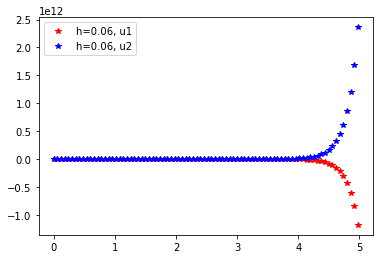

In [44]:
h422 = 0.06
y422 = rungeKutta2(np.copy(x420),f42,np.copy(h422),np.copy(T4))
#print(np.transpose(y411)[0])
plt.figure(8)
plt.plot(np.arange(T[0],T[1]+0.000001,h422),np.transpose(y422)[0],'r*',label='h=0.06, u1')
plt.plot(np.arange(T[0],T[1]+0.000001,h422),np.transpose(y422)[1],'b*',label='h=0.06, u2')
plt.legend()
plt.show()

(c)

(i) Using the same way as (b), we can determine the maximum allowable time step to maintain absolute stability is given as $\frac{2}{39}$, that is $0.0513$

(ii) Code is given below:

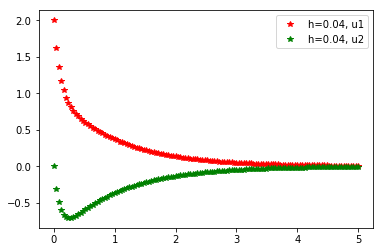

In [45]:
def f43(t,y):
    return np.array([-20.*y[0] - 19.*y[1],\
                    -19.*y[0] - 20.*y[1]])
x430 = np.array([2., 0.])
h431 = 0.04
y431 = rungeKutta2(np.copy(x430),f43,np.copy(h431),np.copy(T4))
#print(np.transpose(y411)[0])
plt.figure(9)
plt.plot(np.arange(T[0],T[1]+0.000001,h431),np.transpose(y431)[0],'r*',label='h=0.04, u1')
plt.plot(np.arange(T[0],T[1]+0.000001,h431),np.transpose(y431)[1],'g*',label='h=0.04, u2')
plt.legend()
plt.show()

(iii) Code is given below:

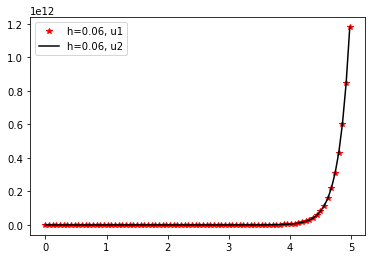

In [46]:
h432 = 0.06
y432 = rungeKutta2(np.copy(x430),f43,np.copy(h432),np.copy(T4))
#print(np.transpose(y411)[0])
plt.figure(10)
plt.plot(np.arange(T[0],T[1]+0.000001,h432),np.transpose(y432)[0],'r*',label='h=0.06, u1')
plt.plot(np.arange(T[0],T[1]+0.000001,h432),np.transpose(y432)[1],'k-',label='h=0.06, u2')
plt.legend()
plt.show()